In [1]:
#install.packages('caret')
library(readxl)
library(ggplot2)
library(plotly)
library(ggstatsplot)
library(tidyr)
library(gridExtra)
#library(caret)
library(dplyr)
#library(factoextra)
options(warn=-1)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Registered S3 method overwritten by 'broom.mixed':
  method      from 
  tidy.gamlss broom

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read_excel('../input/lung-cancer-proyecto-iii/Base_inmunosenescencia_v11.xlsx', sheet = 1)
#df$Clusters <- as.numeric(df$PAM)
df$Clusters[which(df$Clusters == 0)] <- 0
df$Clusters[which(df$Clusters == 1)] <- 1
df$Clusters[which(df$Clusters == 2)] <- 2
df$Clusters[which(df$Clusters == 3)] <- 3
df$Clusters[which(df$Clusters == 4)] <- 4
df$Clusters[which(df$Clusters == 5)] <- 5
df$Clusters[which(df$Clusters == 6)] <- 4
df$Clusters[which(df$Clusters == 7)] <- 6
df$Clusters[which(df$Clusters == 8)] <- 5
df$Clusters[which(df$Clusters == 9)] <- 7
df$Clusters[which(df$Clusters == 10)] <- 8

df$Clusters <- as.factor(df$Clusters)
head(df)

New names:
* Estudios -> Estudios...11
* Est_civil -> Est_civil...12
* Comp_hogar -> Comp_hogar...13
* MOSs -> MOSs...14
* Ansiedad -> Ansiedad...15
* ...



Num_pac,Sexo,Fecha_nac,Fecha_dx,Edad_dx,ECOG,Peso,Talla,IMC,PC_perd_peso,⋯,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19
<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,2,1962-08-10,2018-01-30,55,3,64.5,1.80,19.90741,0.0720,⋯,2.61077345,1.2287489,0.1163991,-0.0212454,-1.2832440,-1.20188754,1.4860039,-0.4624521,-0.3303524,1.0520965
5,2,1959-03-21,2018-02-07,58,1,48.0,1.67,17.21109,0.0780,⋯,1.66793177,0.3877313,0.9584045,-0.2031128,0.8928070,-0.02266133,0.4962536,-0.1398236,-1.1869650,-0.5789949
6,2,1952-11-19,2018-03-16,65,1,83.0,1.78,26.19619,0.1075,⋯,-0.03097537,0.8582613,-0.2435692,-0.1616759,-0.6063758,1.75521286,0.0798942,-0.2640936,-0.5993472,-1.3656815
7,2,1941-05-19,2018-03-28,76,2,66.5,1.65,24.42608,NA,⋯,2.29822716,0.9185976,-0.9589792,0.9913932,-0.7784235,0.93583467,-0.2503857,-0.0956911,1.3625944,-0.9496518
9,2,1954-04-05,2018-04-18,64,0,80.0,1.65,29.38476,0.0000,⋯,-0.89840835,-0.2807580,-0.4253535,0.7945433,-0.4825517,0.64432212,0.4013179,0.4325078,-0.9632974,-0.8208347
10,2,1959-09-20,2018-04-19,58,2,105.0,1.70,36.33218,0.0200,⋯,-0.49455014,-0.7674975,0.4472938,1.5642471,0.7022453,-0.52705288,0.3339309,0.2680528,-0.6028941,-0.5223940


# Barthel

            Df Sum Sq Mean Sq F value Pr(>F)
Clusters     6   1612   268.7   1.089  0.383
Residuals   47  11597   246.8               
[1] "Tukey.test"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Barthel ~ Clusters, data = df_aux1)

$Clusters
           diff       lwr      upr     p adj
1-0  -9.0909091 -33.64139 15.45958 0.9120896
2-0  -2.8571429 -29.76968 24.05539 0.9998909
3-0  -3.3333333 -27.52009 20.85342 0.9995043
4-0 -10.0000000 -34.97997 14.97997 0.8776772
5-0 -23.3333333 -57.53857 10.87190 0.3691103
7-0  -2.0000000 -31.29161 27.29161 0.9999919
2-1   6.2337662 -17.15452 29.62206 0.9815792
3-1   5.7575758 -14.43467 25.94982 0.9741348
4-1  -0.9090909 -22.04500 20.22682 0.9999995
5-1 -14.2424242 -45.74997 17.26512 0.8032296
7-1   7.0909091 -18.99982 33.18164 0.9796649
3-2  -0.4761905 -23.48238 22.53000 1.0000000
4-2  -7.1428571 -30.98158 16.69587 0.9669883
5-2 -20.4761905 -53.85708 12.90470 0.4974474
7-2   0.8571429 -27.4674

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = < 0.001


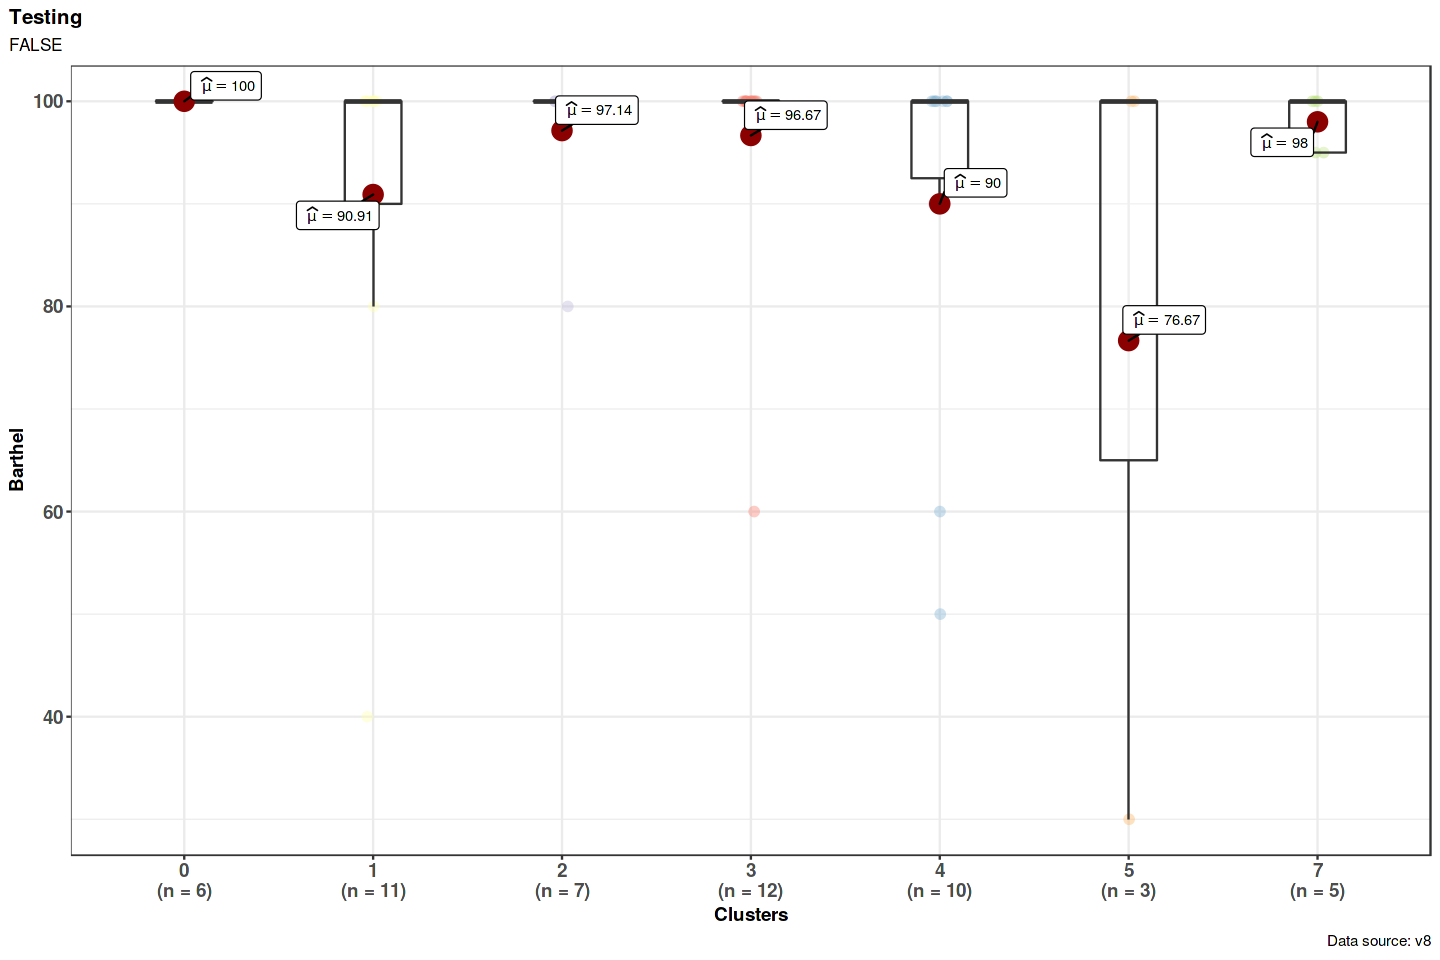

In [3]:
options(repr.plot.width=12, repr.plot.height=8)

df_aux1 <- df[complete.cases(df$Barthel),]

df_aux1 <- df_aux1[which(df_aux1$Clusters != 8),]

mod_aov <- stats::aov(formula = Barthel ~ Clusters, data = df_aux1)
print(summary(mod_aov))


tukey.test <- TukeyHSD(mod_aov)
print('Tukey.test')
print(tukey.test)


ggstatsplot::ggbetweenstats(
  data = df_aux1,
  plot.type = 'box',
  x = Clusters,
  y = Barthel,
  title = "Testing",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  pairwise.comparisons = FALSE,
  palette = 'Set3',
  results.subtitle = FALSE,
  subtitle = FALSE
)

# PC_perd_peso

             Df Sum Sq  Mean Sq F value   Pr(>F)    
Clusters      8 0.0903 0.011287   3.854 0.000464 ***
Residuals   117 0.3426 0.002928                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness
[1] "Tukey.test"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = PC_perd_peso ~ Clusters, data = df)

$Clusters
             diff         lwr         upr     p adj
1-0  0.0394918478 -0.01618840  0.09517210 0.3862475
2-0  0.0023875000 -0.06887836  0.07365336 1.0000000
3-0  0.0233303571 -0.03342724  0.08008795 0.9297315
4-0  0.0179398810 -0.03881772  0.07469748 0.9853135
5-0  0.0355625000 -0.02975374  0.10087874 0.7325456
6-0  0.1399875000  0.05235657  0.22761843 0.0000567
7-0  0.0226319444 -0.04863392  0.09389780 0.9848645
8-0  0.0098175000 -0.05913015  0.07876515 0.9999519
2-1 -0.0371043478 -0.10435285  0.03014415 0.7181636
3-1 -0.0161614907 -0.06778477  0.03546178 0.98

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.001


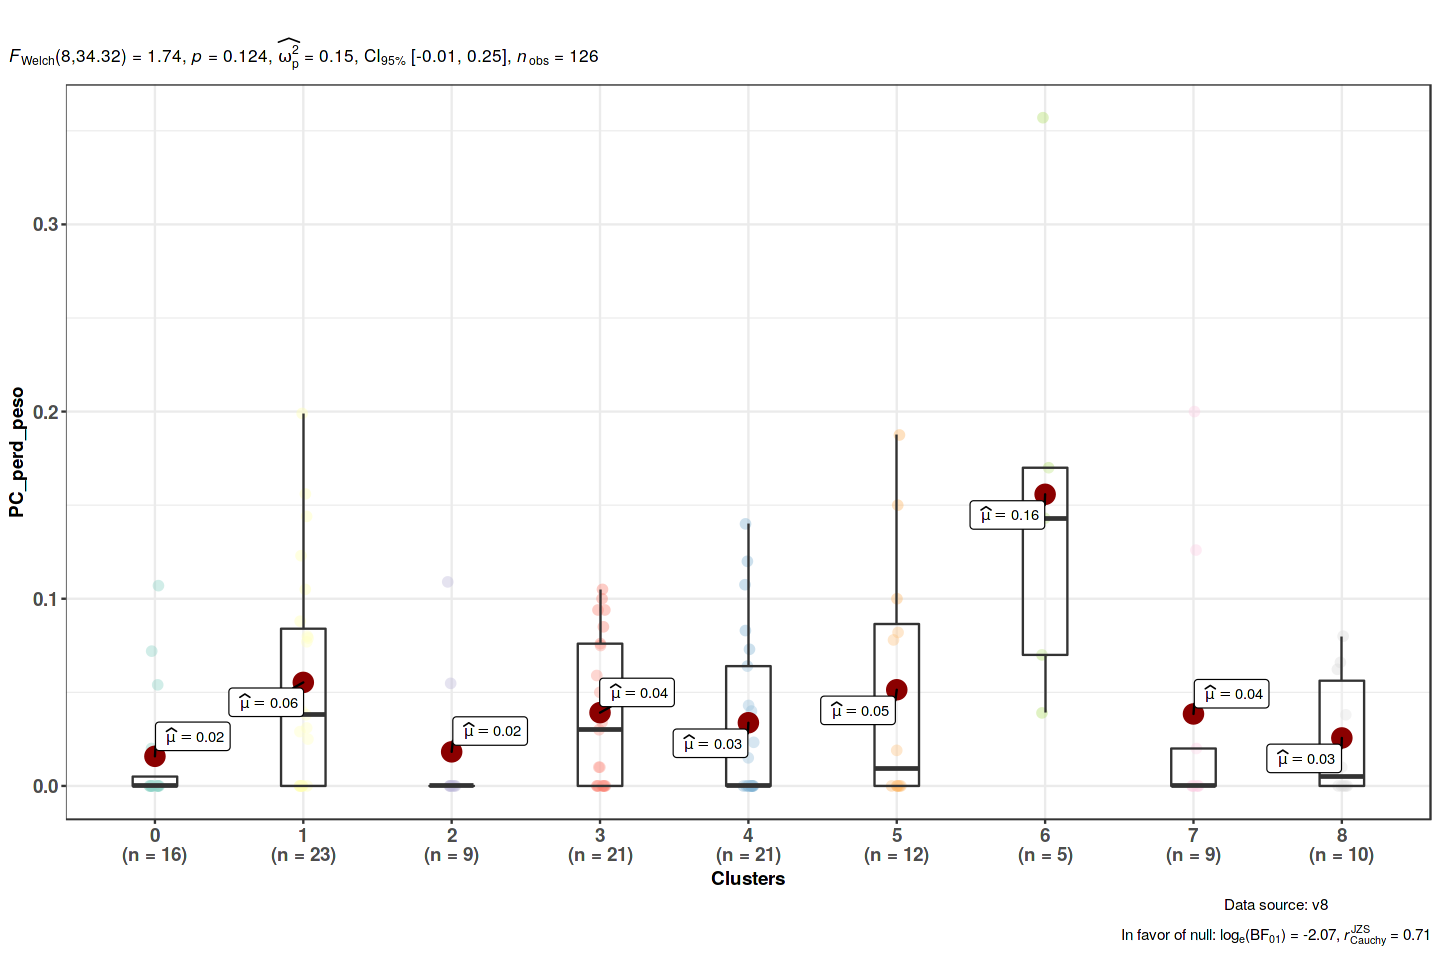

In [4]:
options(repr.plot.width=12, repr.plot.height=8)

mod_aov <- stats::aov(formula = PC_perd_peso ~ Clusters, data = df)
print(summary(mod_aov))


tukey.test <- TukeyHSD(mod_aov)
print('Tukey.test')
print(tukey.test)

g1 <- ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = PC_perd_peso,
  title = "",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

g1
ggsave('perd_peso.png', dpi = 360, width = 10, height = 6)

# Col_total

             Df Sum Sq Mean Sq F value Pr(>F)
Clusters      8  14571    1821   1.355  0.223
Residuals   122 163999    1344               
[1] "Tukey.test"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Col_total ~ Clusters, data = df)

$Clusters
           diff        lwr      upr     p adj
1-0   8.9791667 -28.393224 46.35156 0.9977117
2-0 -14.8875000 -61.565600 31.79060 0.9845526
3-0 -13.9255952 -52.350935 24.49974 0.9659854
4-0  14.7215909 -23.324230 52.76741 0.9501391
5-0   3.3894231 -39.847405 46.62625 0.9999995
6-0   0.4791667 -54.953046 55.91138 1.0000000
7-0  -1.2430556 -49.490604 47.00449 1.0000000
8-0  14.1125000 -32.565600 60.79060 0.9890627
2-1 -23.8666667 -67.449989 19.71666 0.7272474
3-1 -22.9047619 -57.504872 11.69535 0.4844790
4-1   5.7424242 -28.435717 39.92057 0.9998326
5-1  -5.5897436 -45.465603 34.28612 0.9999577
6-1  -8.5000000 -61.352541 44.35254 0.9998796
7-1 -10.2222222 -55.482434 35.03799 0.9985249
8-1   5.1

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.035


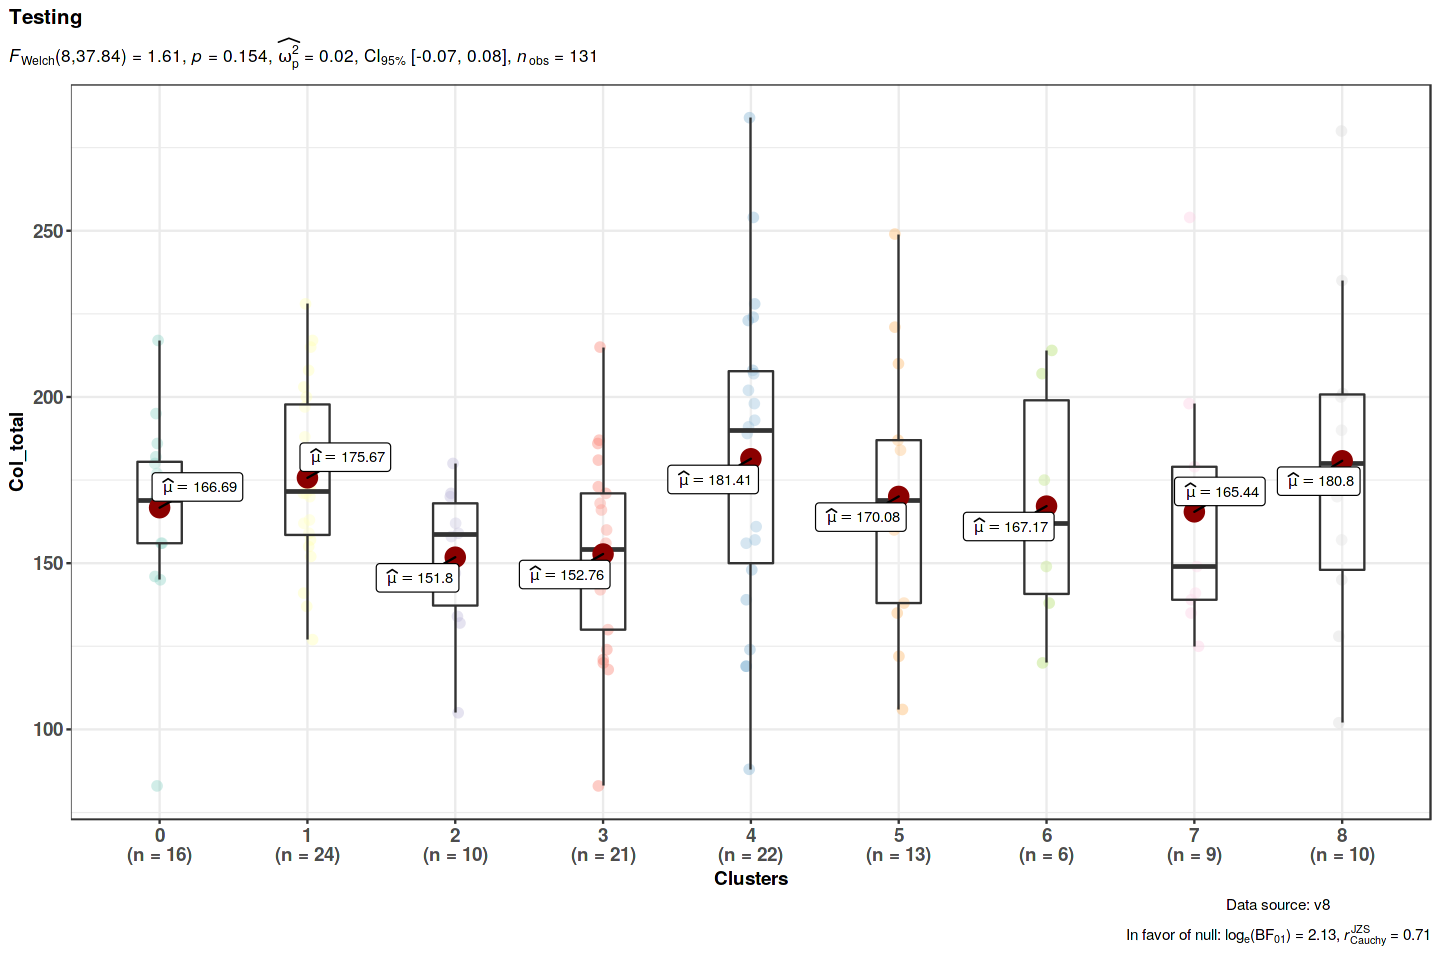

In [5]:
options(repr.plot.width=12, repr.plot.height=8)
# Col_total
mod_aov <- stats::aov(formula = Col_total ~ Clusters, data = df)
print(summary(mod_aov))


tukey.test <- TukeyHSD(mod_aov)
print('Tukey.test')
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Col_total,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

# Col_HDL

             Df Sum Sq Mean Sq F value Pr(>F)
Clusters      8   1267   158.4   0.992  0.446
Residuals   122  19490   159.8               
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Col_HDL ~ Clusters, data = df)

$Clusters
           diff        lwr       upr     p adj
1-0   2.6875000 -10.196078 15.571078 0.9991687
2-0   2.0875000 -14.004084 18.179084 0.9999767
3-0   4.3092076  -8.937359 17.555775 0.9824860
4-0   6.8819398  -6.233794 19.997673 0.7709047
5-0   9.1875000  -5.717756 24.092756 0.5830656
6-0  -3.0995034 -22.208938 16.009931 0.9998716
7-0   1.0763889 -15.556239 17.709017 0.9999999
8-0   1.6152678 -14.476316 17.706852 0.9999968
2-1  -0.6000000 -15.624705 14.424705 1.0000000
3-1   1.6217076 -10.306168 13.549583 0.9999666
4-1   4.1944398  -7.587969 15.976848 0.9694380
5-1   6.5000000  -7.246612 20.246612 0.8566182
6-1  -5.7870034 -24.007135 12.433128 0.9849576
7-1  -1.6111111 -17.213899 13.991677 0.9999960
8-1  -1.07223

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = < 0.001


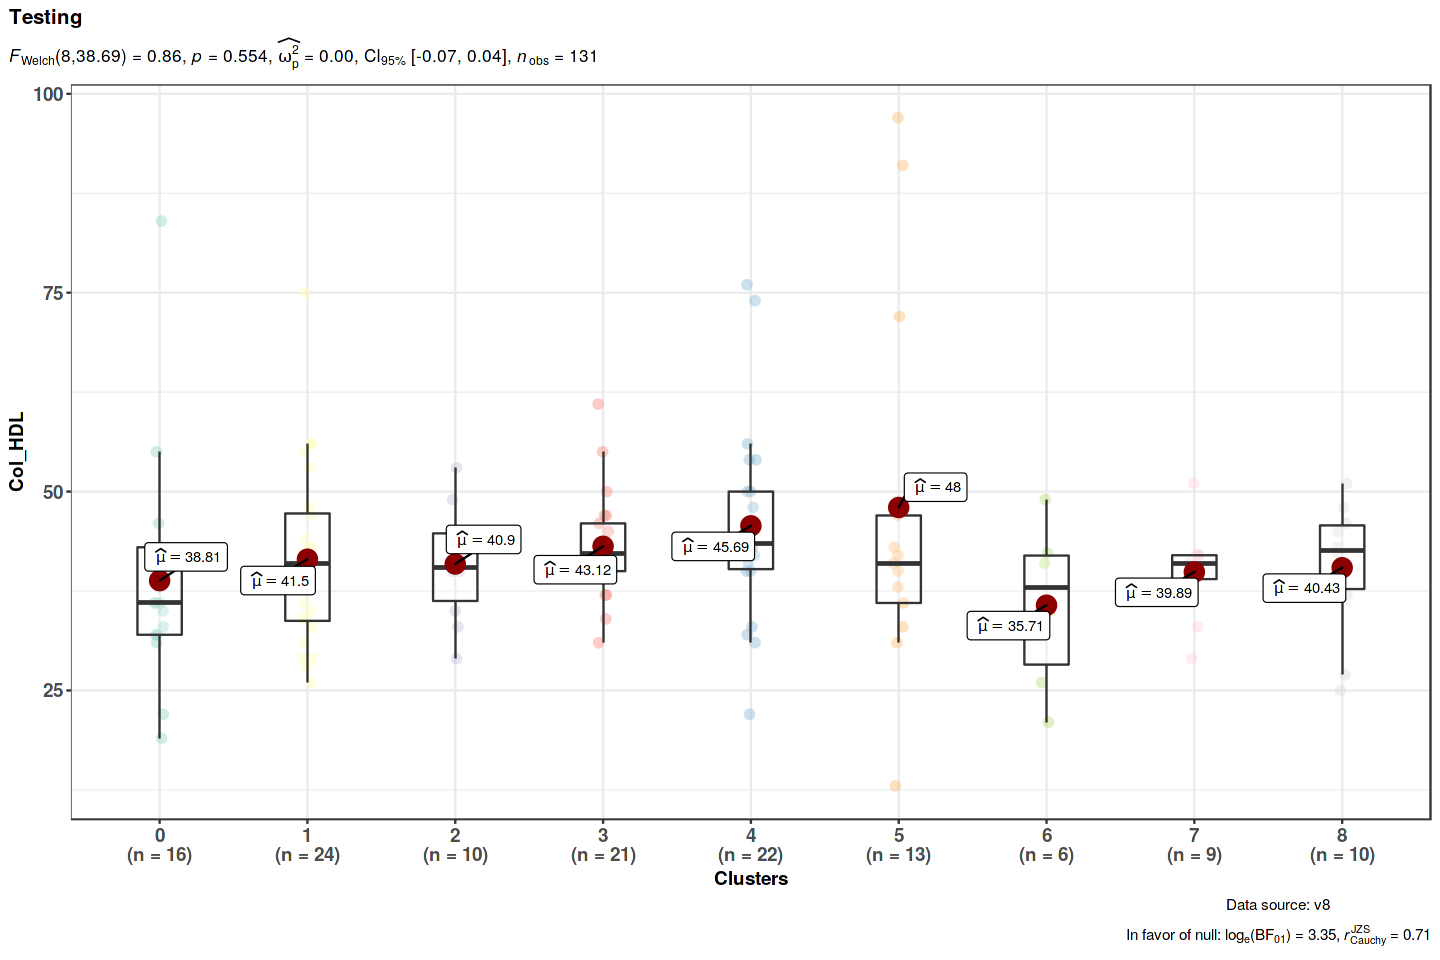

In [6]:
# Col_HDL
mod_aov <- stats::aov(formula = Col_HDL ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Col_HDL,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

# Col_LDL

             Df Sum Sq Mean Sq F value Pr(>F)  
Clusters      8  15100  1887.5   2.445 0.0173 *
Residuals   122  94168   771.9                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Col_LDL ~ Clusters, data = df)

$Clusters
           diff        lwr      upr     p adj
1-0   3.8050747 -24.514204 32.12435 0.9999695
2-0 -17.6199253 -52.990693 17.75084 0.8173165
3-0  -8.0916719 -37.208833 21.02549 0.9937510
4-0   9.7367913 -19.092786 38.56637 0.9778501
5-0  -6.2996728 -39.062784 26.46344 0.9995423
6-0   4.6437136 -37.360565 46.64799 0.9999933
7-0   0.5689636 -35.991068 37.12900 1.0000000
8-0  27.9543557  -7.416412 63.32512 0.2443240
2-1 -21.4250000 -54.450671 11.60067 0.5129043
3-1 -11.8967466 -38.115304 14.32181 0.8827956
4-1   5.9317166 -19.967091 31.83052 0.9983701
5-1 -10.1047475 -40.321054 20.11156 0.9791710
6-1   0.8386389 -39.210870 40.88815 1.0000000
7

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.005


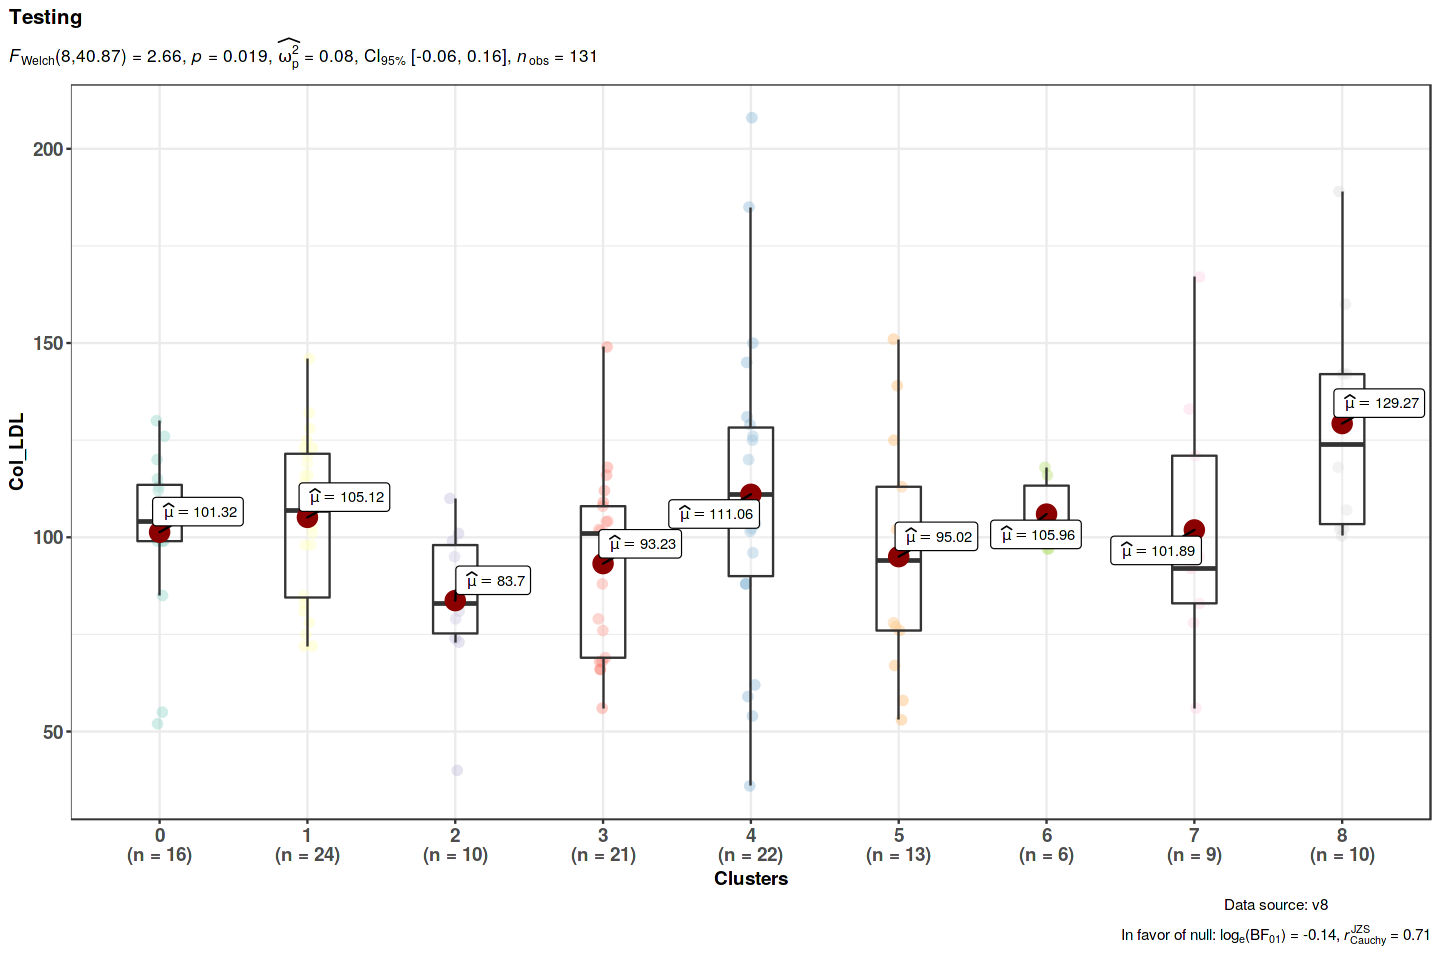

In [7]:
mod_aov <- stats::aov(formula = Col_LDL ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Col_LDL,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

# Albumina

             Df Sum Sq Mean Sq F value   Pr(>F)    
Clusters      8  9.905  1.2381   7.622 3.11e-08 ***
Residuals   122 19.817  0.1624                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Albumina ~ Clusters, data = df)

$Clusters
            diff           lwr        upr     p adj
1-0 -0.122916667 -0.5337335738  0.2879002 0.9897844
2-0  0.178750000 -0.3343601526  0.6918602 0.9731980
3-0 -0.276488095 -0.6988795743  0.1459034 0.5003342
4-0 -0.013068182 -0.4312877909  0.4051514 1.0000000
5-0 -0.004326923 -0.4796088024  0.4709550 1.0000000
6-0 -1.181250000 -1.7905899451 -0.5719101 0.0000004
7-0  0.229861111 -0.3005012355  0.7602235 0.9072824
8-0 -0.151250000 -0.6643601526  0.3618602 0.9907394
2-1  0.301666667 -0.1774240580  0.7807574 0.5542311
3-1 -0.153571429 -0.5339139785  0.2267711 0.9366528
4-1  0.109848485 -0.2658555678  0.4855525 0.9912248
5-1  0.1

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.817


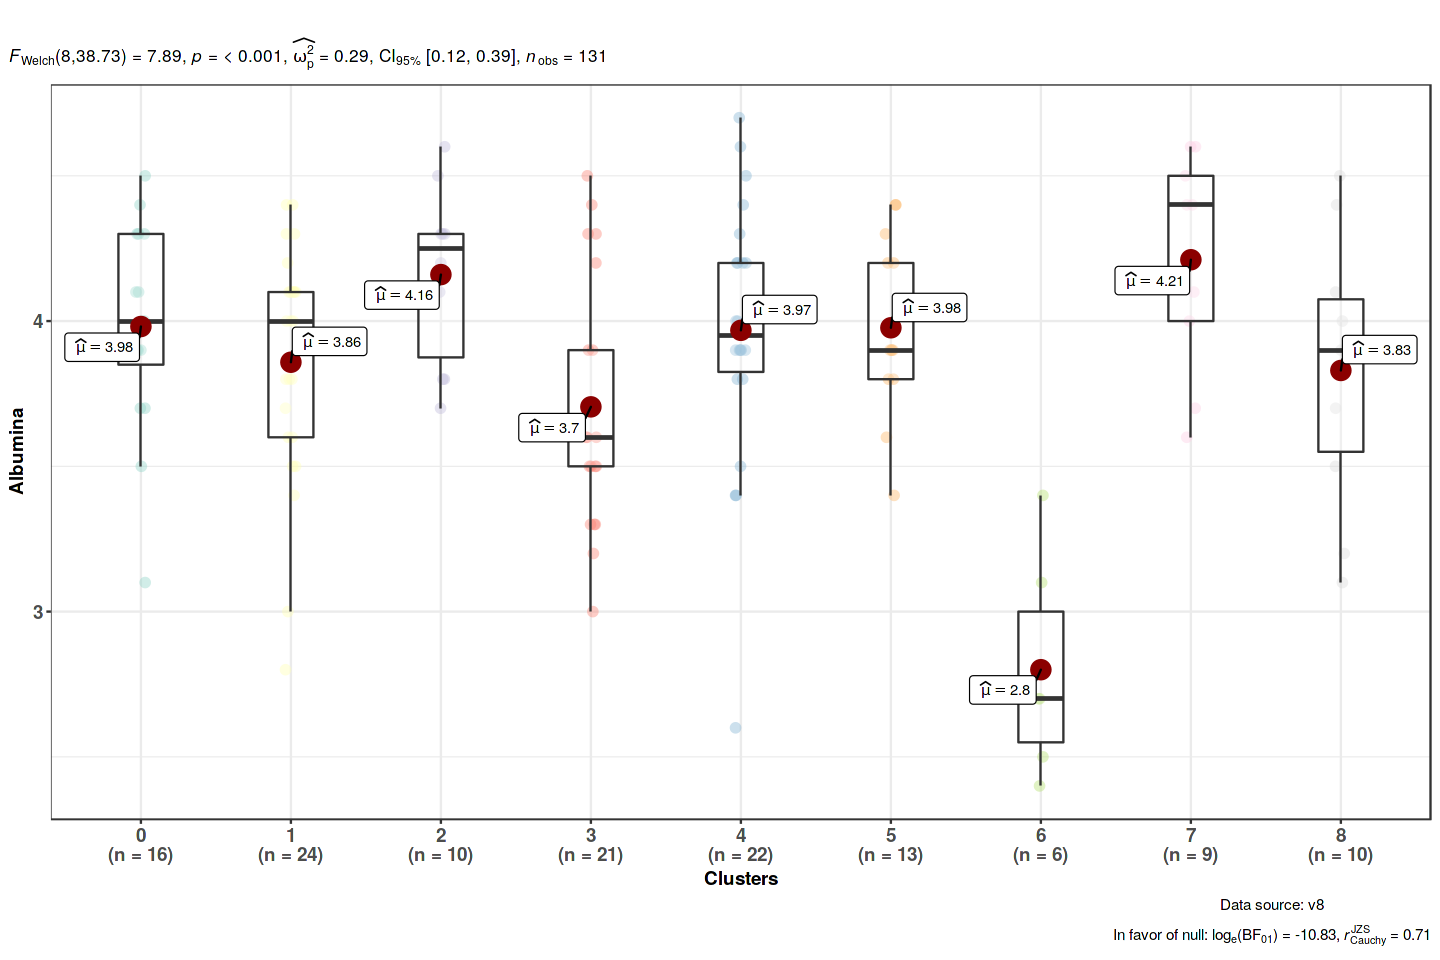

In [8]:
mod_aov <- stats::aov(formula = Albumina ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

g2 <- ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Albumina,
  title = '',
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)
g2
ggsave('albumina.png', dpi = 360, width = 10, height = 6)

# PCR

             Df Sum Sq Mean Sq F value   Pr(>F)    
Clusters      8  9.905  1.2381   7.622 3.11e-08 ***
Residuals   122 19.817  0.1624                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Albumina ~ Clusters, data = df)

$Clusters
            diff           lwr        upr     p adj
1-0 -0.122916667 -0.5337335738  0.2879002 0.9897844
2-0  0.178750000 -0.3343601526  0.6918602 0.9731980
3-0 -0.276488095 -0.6988795743  0.1459034 0.5003342
4-0 -0.013068182 -0.4312877909  0.4051514 1.0000000
5-0 -0.004326923 -0.4796088024  0.4709550 1.0000000
6-0 -1.181250000 -1.7905899451 -0.5719101 0.0000004
7-0  0.229861111 -0.3005012355  0.7602235 0.9072824
8-0 -0.151250000 -0.6643601526  0.3618602 0.9907394
2-1  0.301666667 -0.1774240580  0.7807574 0.5542311
3-1 -0.153571429 -0.5339139785  0.2267711 0.9366528
4-1  0.109848485 -0.2658555678  0.4855525 0.9912248
5-1  0.1

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = < 0.001


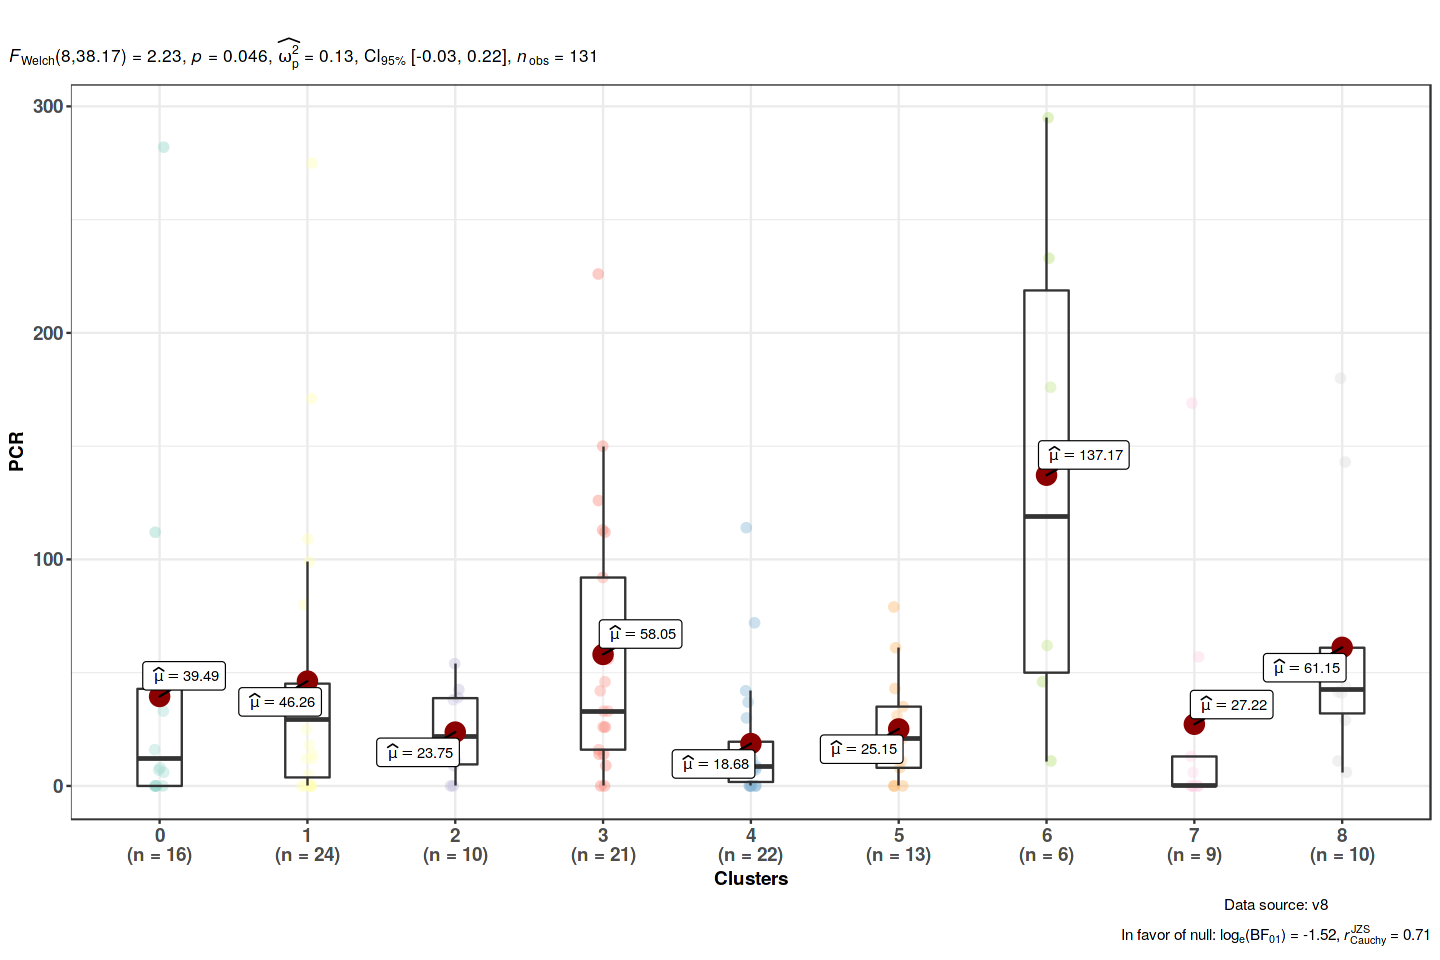

In [9]:
#### mod_aov <- stats::aov(formula = PCR ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

g3 <- ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = PCR,
  title = "",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)
g3
ggsave('pcr.png', dpi = 360, width = 10, height = 6)

# IL-6

             Df Sum Sq Mean Sq F value   Pr(>F)    
Clusters      8  34249    4281   4.615 6.09e-05 ***
Residuals   122 113167     928                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = `IL-6` ~ Clusters, data = df)

$Clusters
           diff         lwr        upr     p adj
1-0  -0.9629941  -32.007902  30.081913 1.0000000
2-0  -8.0680964  -46.843173  30.706981 0.9991837
3-0  13.3937662  -18.525817  45.313349 0.9218702
4-0 -11.6262434  -43.230564  19.978077 0.9628282
5-0 -12.9451715  -48.861614  22.971271 0.9670811
6-0  61.5266234   15.479584 107.573663 0.0015172
7-0 -13.8178211  -53.896624  26.260982 0.9748480
8-0  -4.9510910  -43.726168  33.823986 0.9999794
2-1  -7.1051023  -43.309375  29.099170 0.9994680
3-1  14.3567603  -14.385239  43.098760 0.8150707
4-1 -10.6632493  -39.054723  17.728225 0.9580176
5-1 -11.9821774  -45.106694  21.142339 0.96636

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = < 0.001


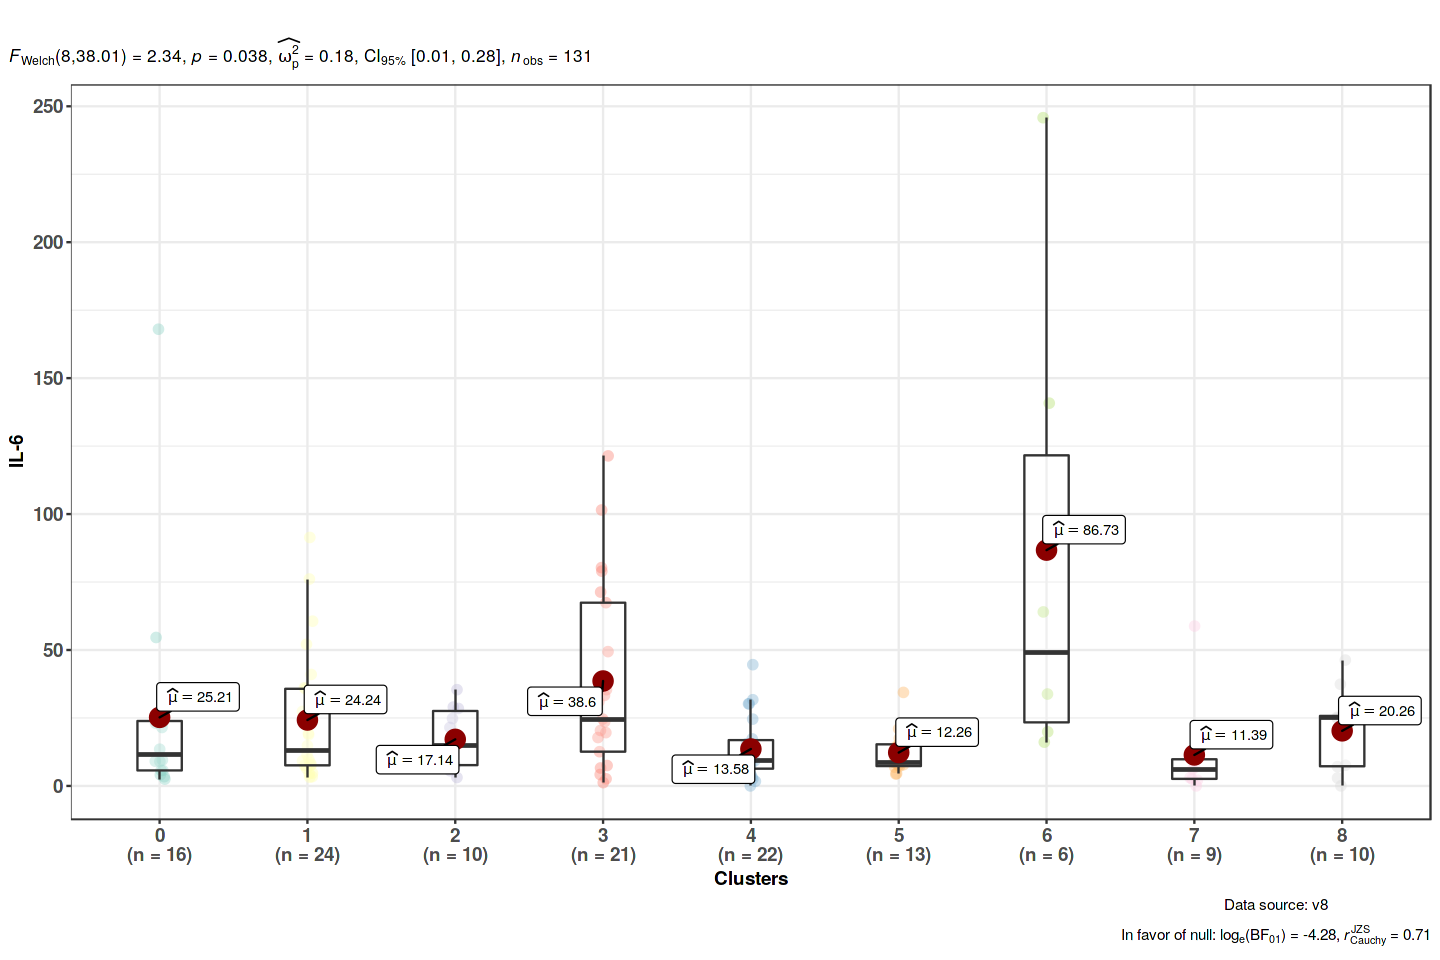

In [10]:
# `IL-6`
mod_aov <- stats::aov(formula = `IL-6` ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

g4 <- ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = `IL-6`,
  title = "",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)
g4
ggsave('il.png', dpi = 360, width = 10, height = 6)

# Edad_dx

             Df Sum Sq Mean Sq F value Pr(>F)
Clusters      8   1245   155.7   1.425  0.193
Residuals   122  13324   109.2               
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Edad_dx ~ Clusters, data = df)

$Clusters
           diff        lwr       upr     p adj
1-0  -0.8958333 -11.548220  9.756553 0.9999992
2-0   6.5375000  -6.767326 19.842326 0.8283519
3-0   3.8184524  -7.134060 14.770965 0.9730705
4-0   0.5284091 -10.315928 11.372746 1.0000000
5-0  -1.6394231 -13.963371 10.684525 0.9999717
6-0  -6.5625000 -22.362542  9.237542 0.9260532
7-0   5.7708333  -7.981338 19.523005 0.9218492
8-0   2.7375000 -10.567326 16.042326 0.9992478
2-1   7.4333333  -4.989377 19.856044 0.6220243
3-1   4.7142857  -5.147908 14.576479 0.8490027
4-1   1.4242424  -8.317676 11.166161 0.9999417
5-1  -0.7435897 -12.109549 10.622369 0.9999999
6-1  -5.6666667 -20.731416  9.398082 0.9576420
7-1   6.6666667  -6.234014 19.567347 0.7852917
8-1   3.63333

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.712


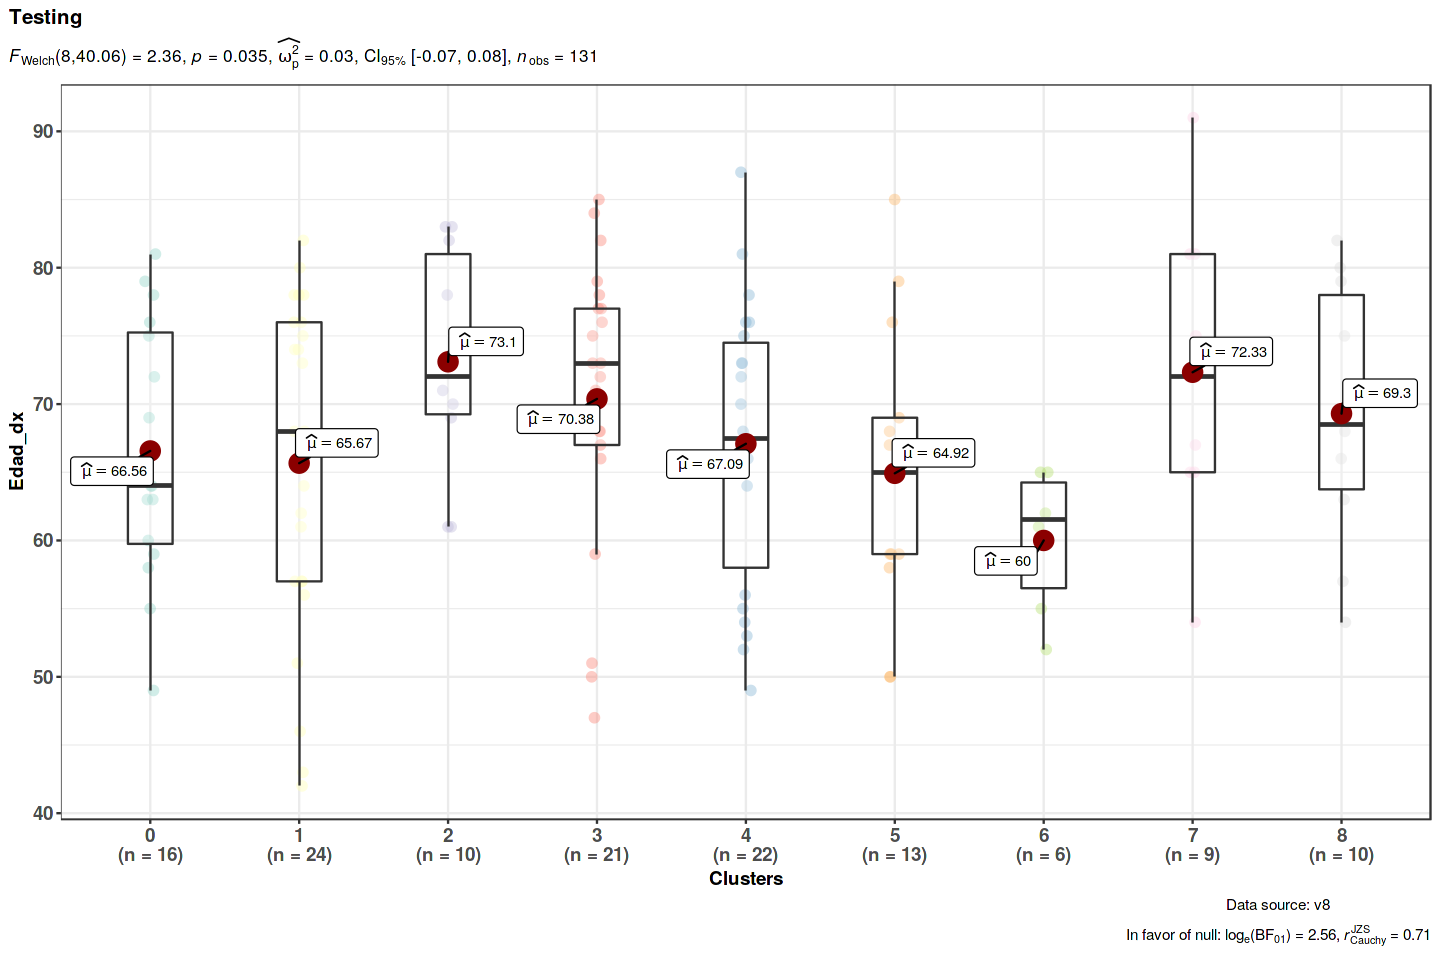

In [11]:
mod_aov <- stats::aov(formula = Edad_dx ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Edad_dx,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

# Peso

             Df Sum Sq Mean Sq F value Pr(>F)
Clusters      8   1151   143.8   0.646  0.738
Residuals   122  27181   222.8               
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Peso ~ Clusters, data = df)

$Clusters
           diff       lwr       upr     p adj
1-0 -6.44963885 -21.66438  8.765103 0.9174984
2-0  0.51000000 -18.49321 19.513206 1.0000000
3-0 -3.53333333 -19.17674 12.110076 0.9985244
4-0 -4.85736916 -20.34627 10.631534 0.9861353
5-0 -5.36923077 -22.97145 12.232992 0.9884112
6-0 -8.33672964 -30.90384 14.230379 0.9618944
7-0  0.05555556 -19.58659 19.697702 1.0000000
8-0 -8.93000000 -27.93321 10.073206 0.8608246
2-1  6.95963885 -10.78365 24.702924 0.9461335
3-1  2.91630552 -11.16981 17.002419 0.9992130
4-1  1.59226970 -12.32206 15.506595 0.9999912
5-1  1.08040808 -15.15353 17.314341 0.9999999
6-1 -1.88709079 -23.40398 19.629803 0.9999989
7-1  6.50519441 -11.92077 24.931161 0.9709343
8-1 -2.48036115 -20.22365 15.26

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.019


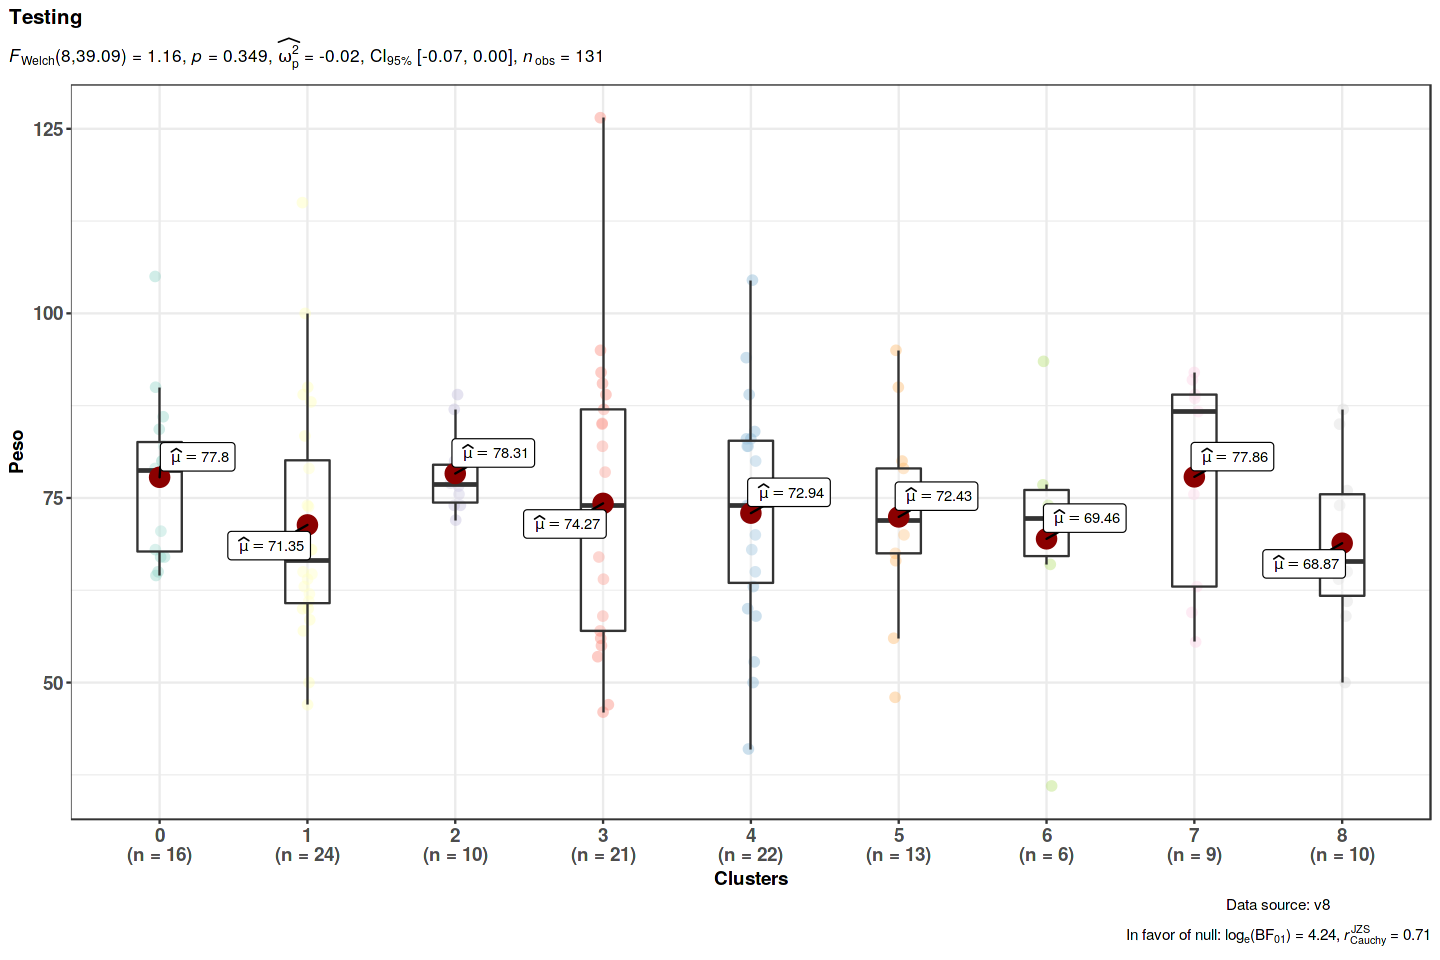

In [12]:
mod_aov <- stats::aov(formula = Peso ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Peso,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

# Talla

             Df Sum Sq  Mean Sq F value Pr(>F)  
Clusters      8 0.1077 0.013463   1.774 0.0885 .
Residuals   122 0.9259 0.007589                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = Talla ~ Clusters, data = df)

$Clusters
            diff         lwr        upr     p adj
1-0 -0.028505849 -0.11730569 0.06029399 0.9839017
2-0  0.055625000 -0.05528597 0.16653597 0.8116915
3-0 -0.031041667 -0.12234340 0.06026007 0.9769188
4-0 -0.015699589 -0.10609956 0.07470038 0.9997853
5-0 -0.002067308 -0.10480153 0.10066692 1.0000000
6-0 -0.065898645 -0.19761010 0.06581281 0.8137031
7-0  0.027847222 -0.08679288 0.14248732 0.9975282
8-0 -0.047375000 -0.15828597 0.06353597 0.9141022
2-1  0.084130849 -0.01942667 0.18768837 0.2121788
3-1 -0.002535818 -0.08474850 0.07967686 1.0000000
4-1  0.012806260 -0.06840379 0.09401631 0.9998963
5-1  0.026438541 -0.06830975 0.12118683 0.99

Note: Bartlett's test for homogeneity of variances for factor Clusters: p-value = 0.316


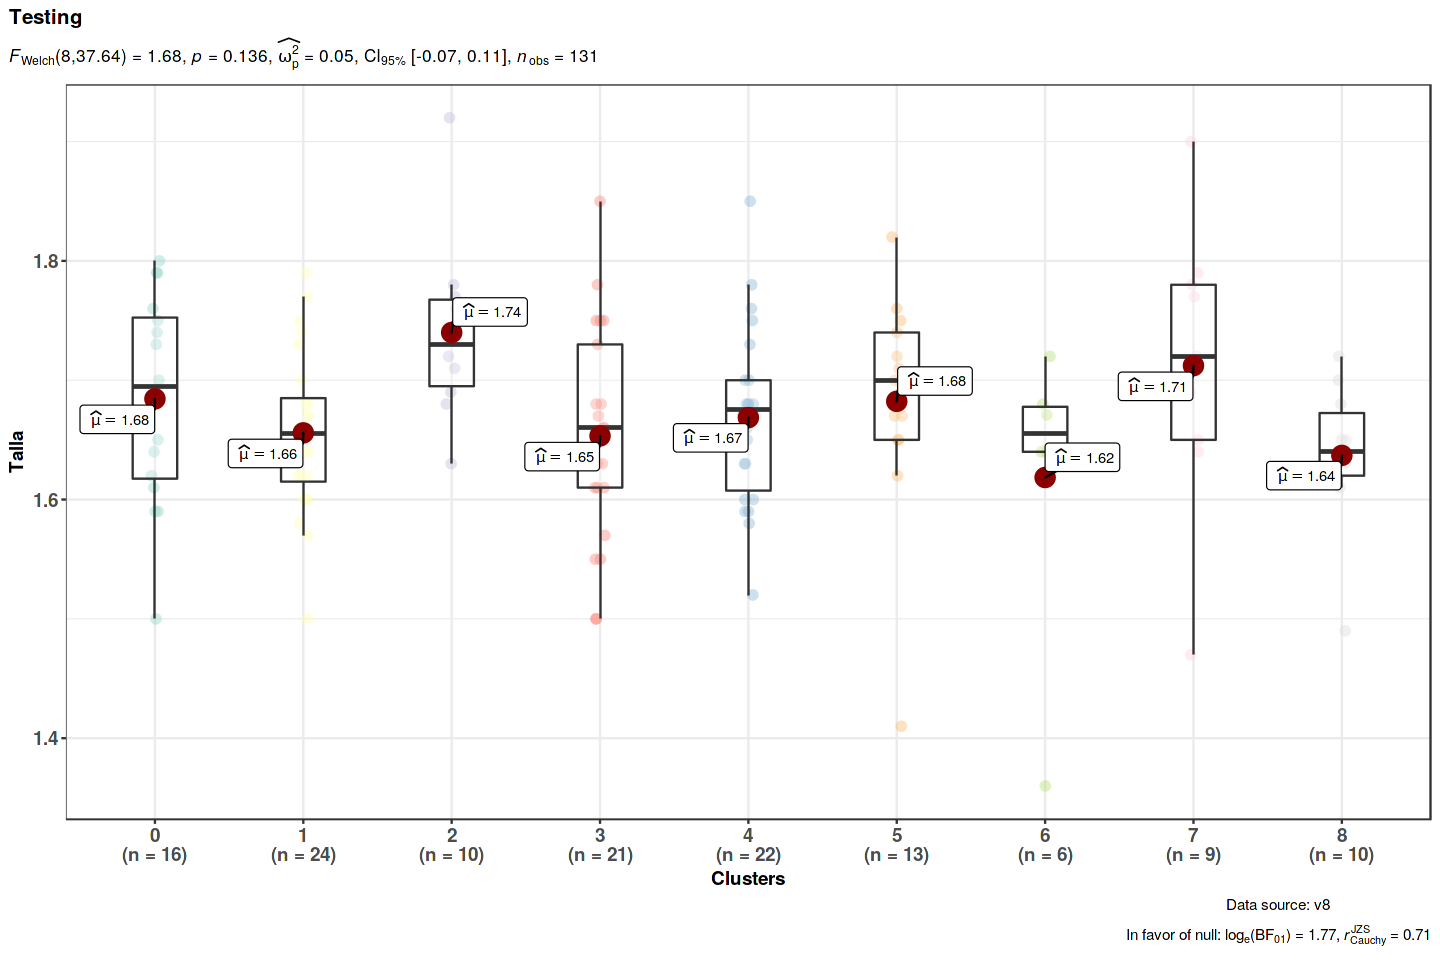

In [13]:
mod_aov <- stats::aov(formula = Talla ~ Clusters, data = df)
print(summary(mod_aov))

tukey.test <- TukeyHSD(mod_aov)
print(tukey.test)

ggstatsplot::ggbetweenstats(
  data = df,
  x = Clusters,
  y = Talla,
  title = "Testing",
  plot.type = "box",
  type = "p",
  caption = "Data source: v8",
  ggstatsplot.layer = TRUE,
  pairwise.display = "s",
  palette = 'Set3'
)

In [14]:
library(gridExtra)

# Estadio


	Pearson's Chi-squared test

data:  df$Estadio and df$Clusters
X-squared = 72.868, df = 72, p-value = 0.4492

Note: 95% CI for effect size estimate was computed with 100 bootstrap samples.


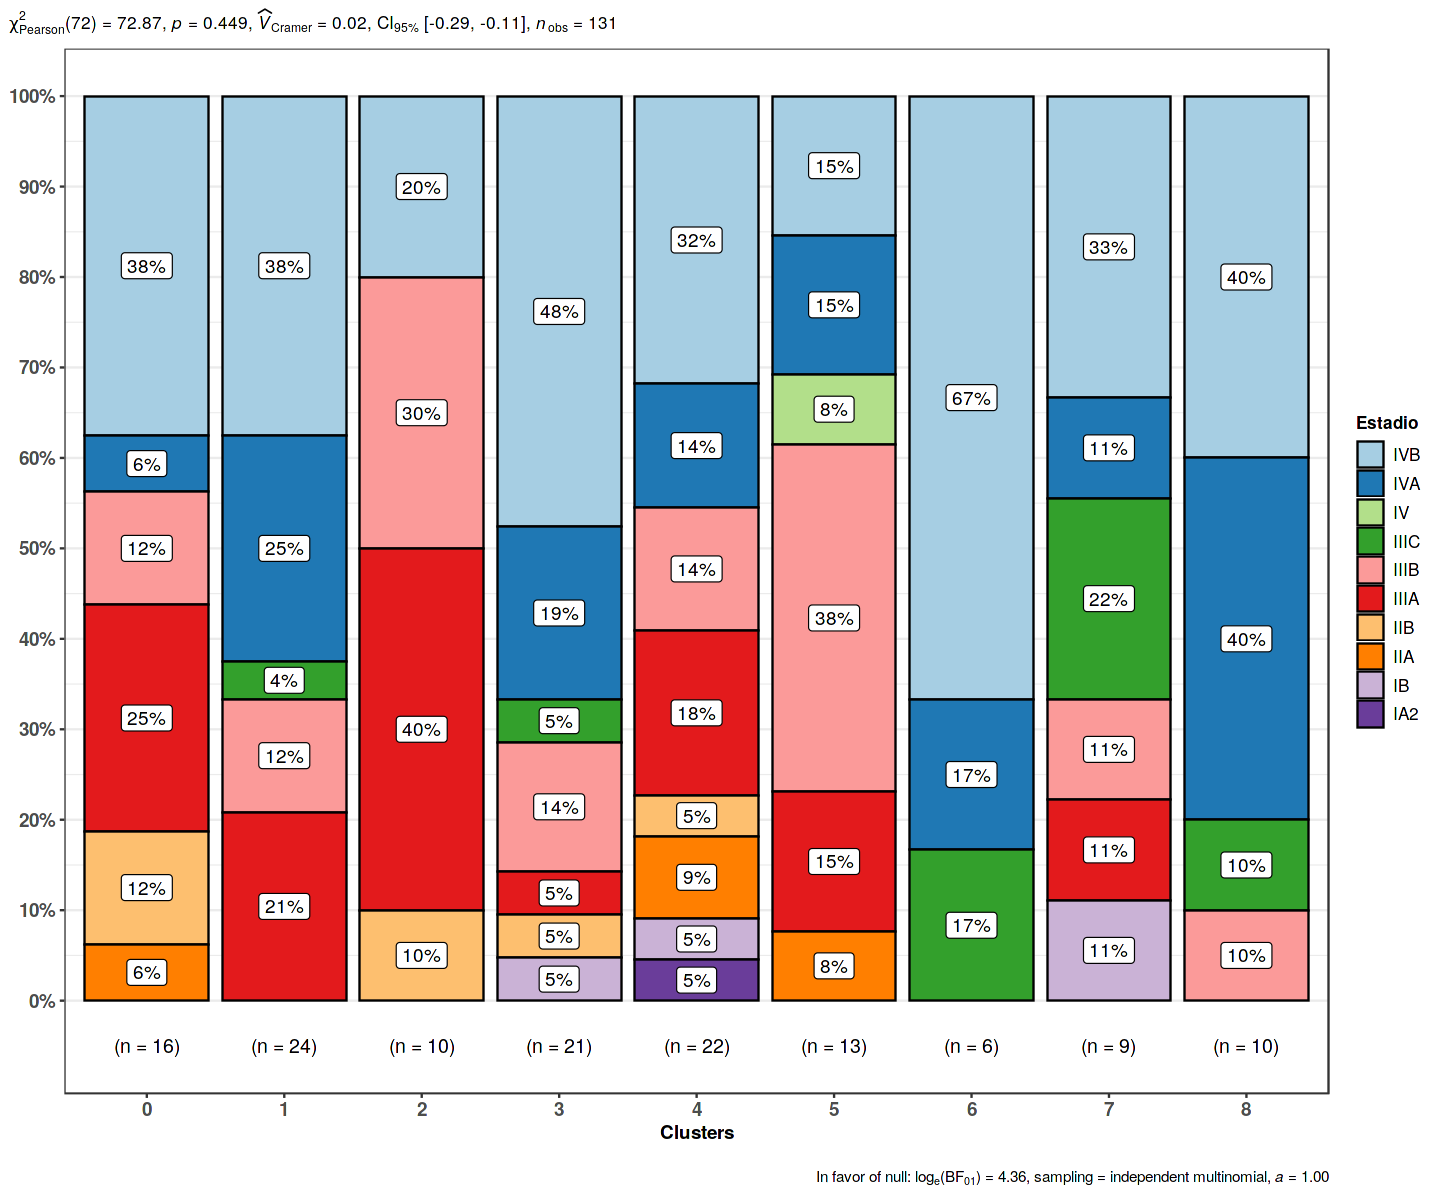

In [15]:
options(repr.plot.width=12, repr.plot.height=10)
chisq <- chisq.test(x = df$Estadio, y = df$Clusters)
print(chisq)
ggbarstats(
  data = df,
  y = Clusters,
  x = Estadio,
  palette = 'Paired',
    proportion.test = FALSE
)

In [16]:
est <- as.factor(df$Estadio)
levels(est)

d<- df %>% 
group_by(Estadio) %>%
mutate(estadio_agr = case_when( 
        Estadio == "IA2" | Estadio == "IB" ~  "I",
        Estadio == "IIA" | Estadio == "IIB" ~  "II",
        Estadio == "IIIA" | Estadio == "IIIB" | Estadio == "IIIC" ~  "III",
        Estadio == "IV" | Estadio == "IVA" | Estadio == "IVB" ~ "IV",
    )
  )

[1] "IA2"  "IB"   "IIA"  "IIB"  "IIIA" "IIIB" "IIIC" "IV"   "IVA"  "IVB"

In [17]:
aux <- d
aux <- aux %>%
mutate(estadio_agr = case_when( 
        Clusters == 0 ~  0,
    Clusters == 1 ~  1,
    Clusters == 2 ~  1,
    Clusters == 3 ~  1,
    Clusters == 4 ~  1,
    Clusters == 5 ~  1,
    Clusters == 6 ~  1,
    Clusters == 7 ~  1,
    Clusters == 8 ~  1,
    Clusters == 9 ~  1,
    Clusters == 10 ~  1,
    )
  )
chisq <- chisq.test(x = aux$estadio_agr, y = aux$Clusters)
print(chisq)


	Pearson's Chi-squared test

data:  aux$estadio_agr and aux$Clusters
X-squared = 131, df = 8, p-value < 2.2e-16




	Pearson's Chi-squared test

data:  d$estadio_agr and d$Clusters
X-squared = 28.999, df = 24, p-value = 0.2202



Adding missing grouping variables: `Estadio`



Note: 95% CI for effect size estimate was computed with 100 bootstrap samples.


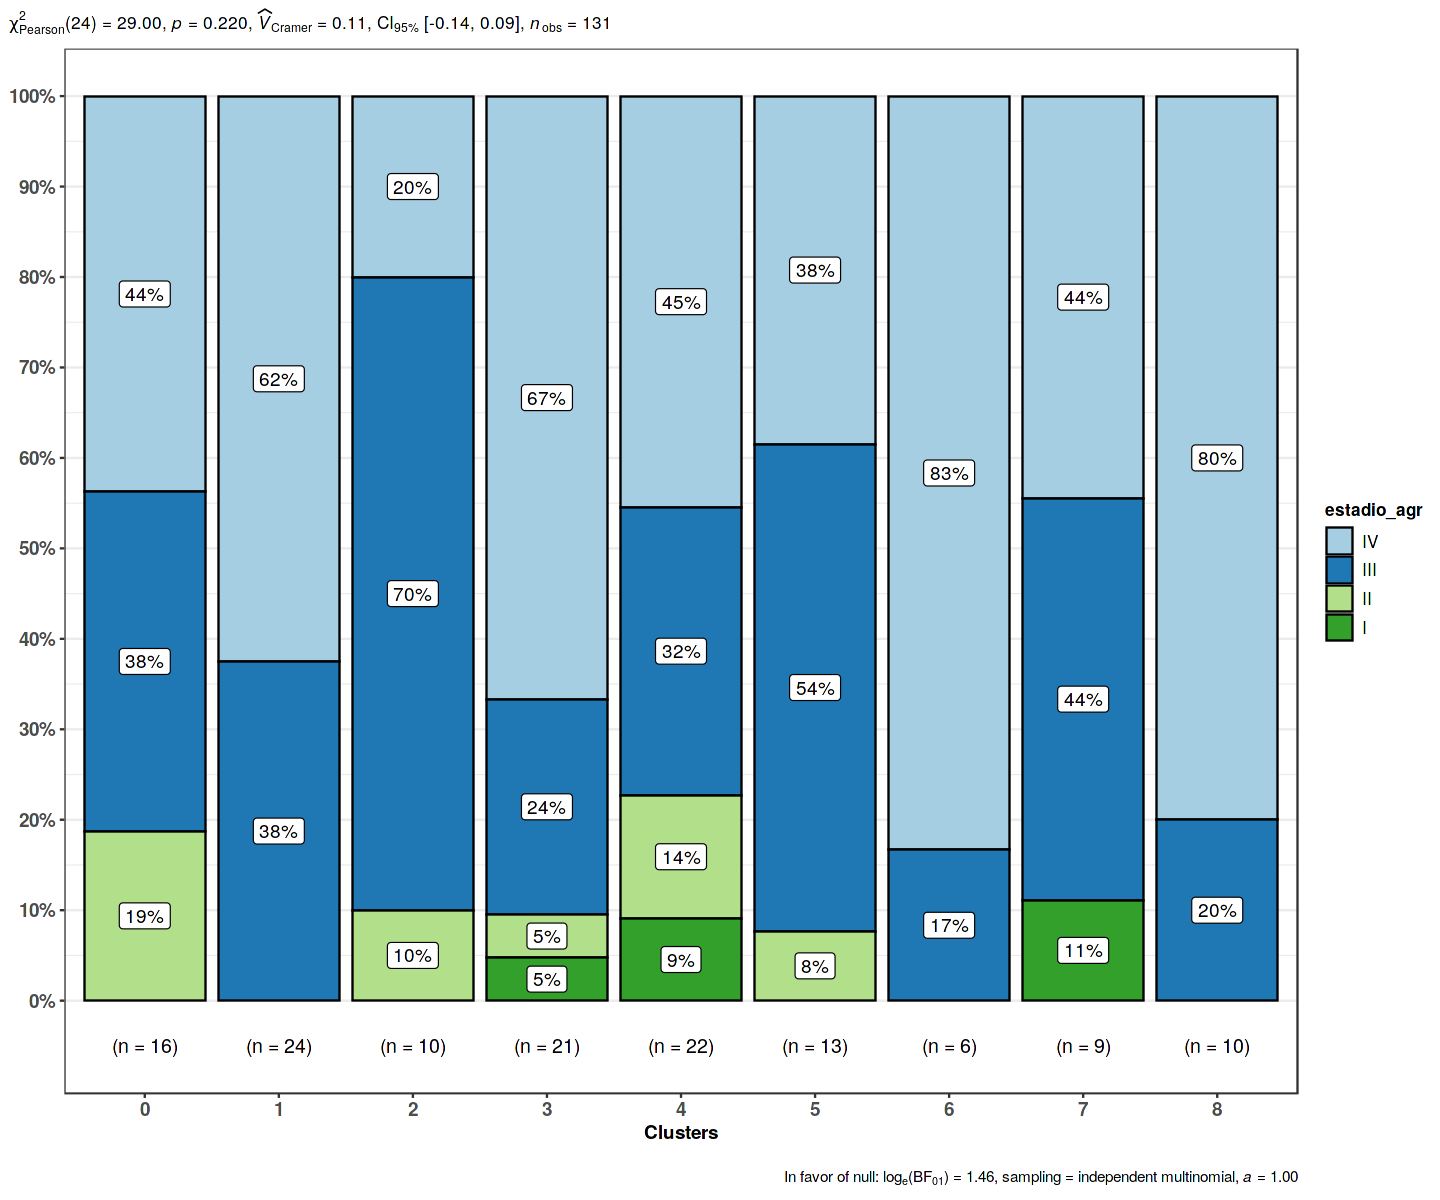

In [18]:
options(repr.plot.width=12, repr.plot.height=10)
chisq <- chisq.test(x = d$estadio_agr, y = d$Clusters)
print(chisq)
ggbarstats(
  data = d,
  y = Clusters,
  x = estadio_agr,
  palette = 'Paired',
  results.subtitle = TRUE,
    proportion.test = FALSE
)

# Histologia

Note: 95% CI for effect size estimate was computed with 100 bootstrap samples.


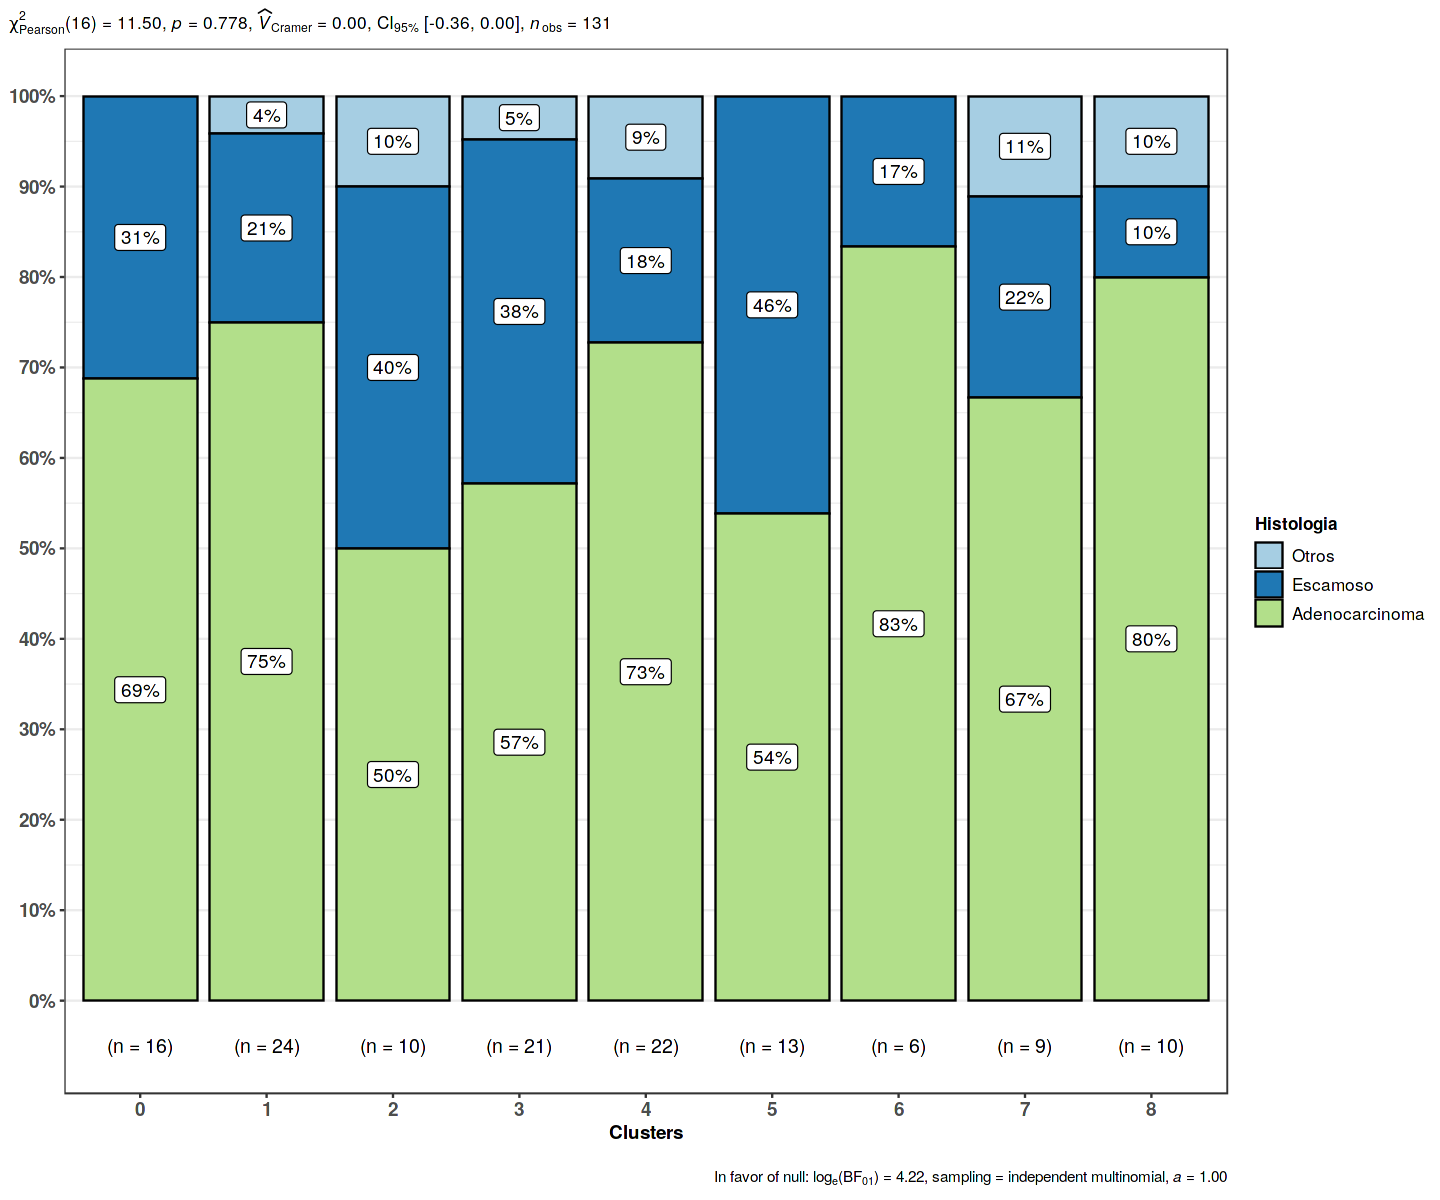

In [19]:
options(repr.plot.width=12, repr.plot.height=10)
ggbarstats(
  data = df,
  y = Clusters,
  x = Histologia,
  palette = 'Paired',
    proportion.test = FALSE
)

# Estatinas

Note: 95% CI for effect size estimate was computed with 100 bootstrap samples.


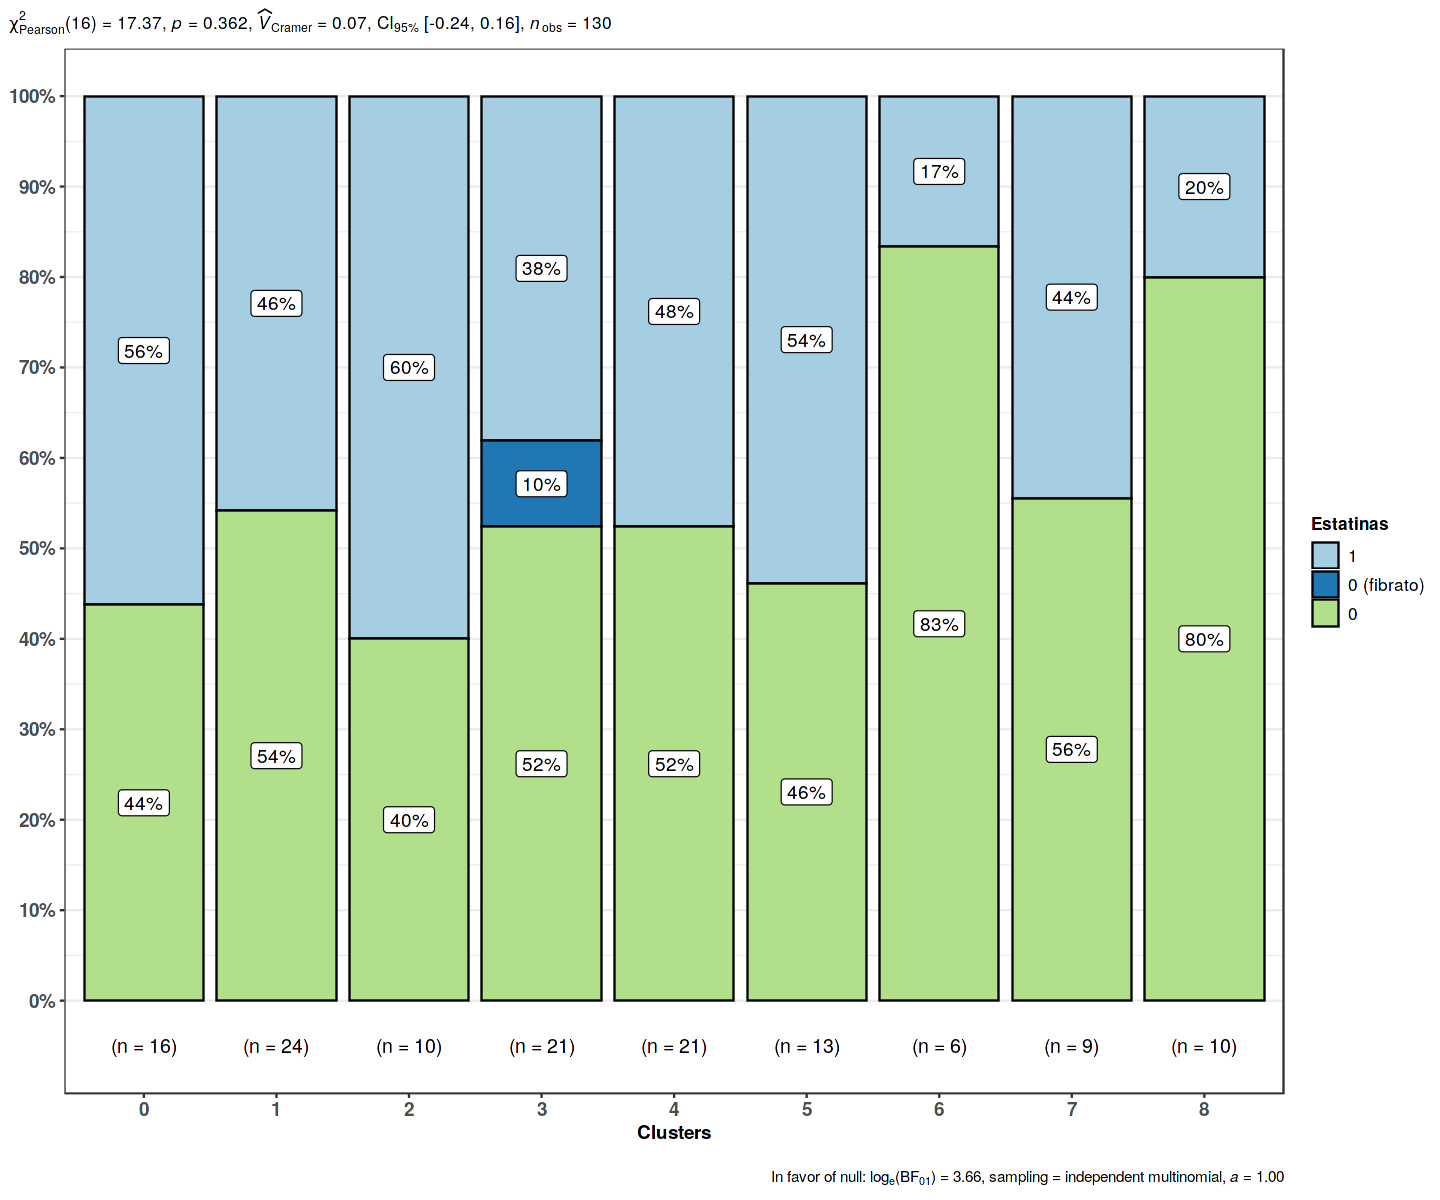

In [20]:
options(repr.plot.width=12, repr.plot.height=10)
ggbarstats(
  data = df,
  y = Clusters,
  x = Estatinas,
  palette = 'Paired',
    proportion.test = FALSE
)

# Hab_tabaq

Note: 95% CI for effect size estimate was computed with 100 bootstrap samples.


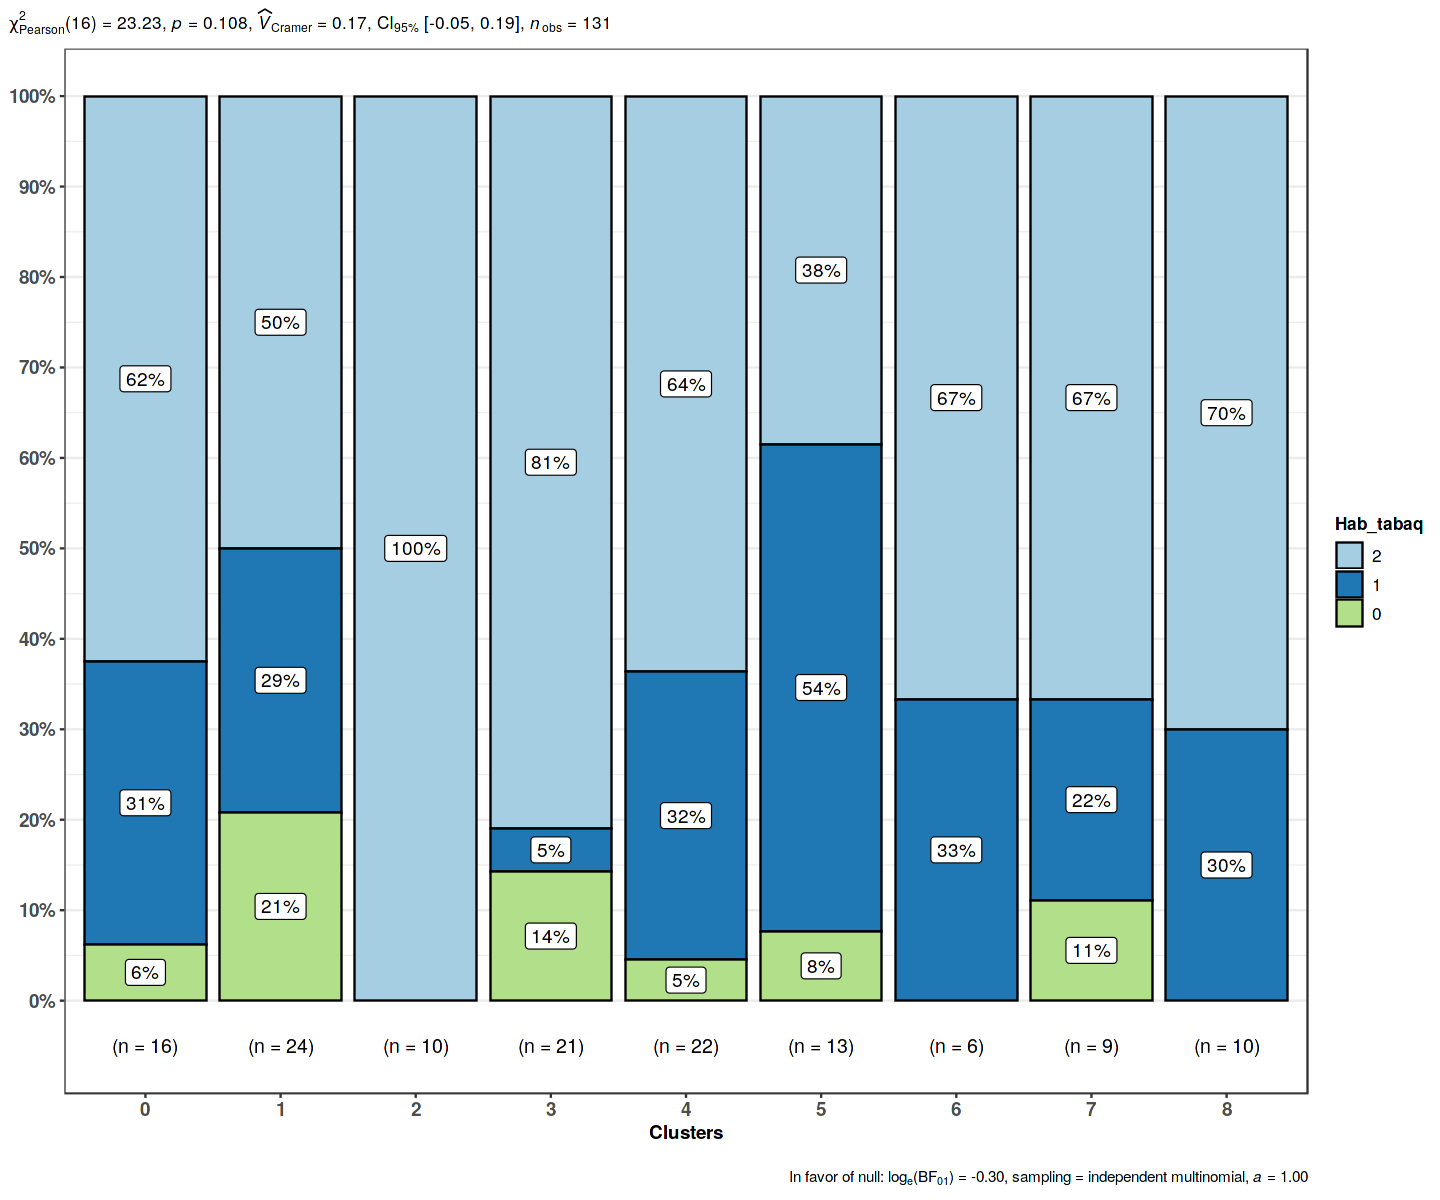

In [21]:
options(repr.plot.width=12, repr.plot.height=10)
ggbarstats(
  data = df,
  y = Clusters,
  x = Hab_tabaq,
  palette = 'Paired',
    proportion.test = FALSE
)